In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
data ={
    'type': ['pass','pass','pass','pass','pass', 'pass','pass','pass','pass'],
    'from':['Sylvain', 'Henry', 'Mayer', 'Martin', 'Habib', 'Martin', 'Martin', 'Mayer', 'Martin'],
    'to': ['Henry', 'Mayer', 'Martin', 'Habib', 'Mayer', 'Mayer', 'Silvain', 'Silvain', 'Henry'],
    'outcome':['complete','complete','complete','complete','complete','complete','complete','complete','complete'],
    'goal_possesion': ['TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'FALSE']
    }

In [ ]:
df = pd.DataFrame(data)
df

,type,from,to,outcome,goal_possesion
0,pass,Sylvain,Henry,complete,TRUE
1,pass,Henry,Mayer,complete,FALSE
2,pass,Mayer,Martin,complete,TRUE
3,pass,Martin,Habib,complete,TRUE
4,pass,Habib,Mayer,complete,TRUE
5,pass,Martin,Mayer,complete,FALSE
6,pass,Martin,Silvain,complete,TRUE
7,pass,Mayer,Silvain,complete,TRUE
8,pass,Martin,Henry,complete,FALSE


In [ ]:
def transform_data(x):
  if x == 'complete':
    return 1
  elif x == 'TRUE':
    return 1
  elif x == 'FALSE':
    return 0

# Transformasi data kategorikal ke nilai numerik
df['outcome'] = df['outcome'].apply(transform_data)
df['goal_possesion'] = df['goal_possesion'].apply(transform_data)

In [ ]:
df

,type,from,to,outcome,goal_possesion
0,pass,Sylvain,Henry,1,1
1,pass,Henry,Mayer,1,0
2,pass,Mayer,Martin,1,1
3,pass,Martin,Habib,1,1
4,pass,Habib,Mayer,1,1
5,pass,Martin,Mayer,1,0
6,pass,Martin,Silvain,1,1
7,pass,Mayer,Silvain,1,1
8,pass,Martin,Henry,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   type            9 non-null      object
 1   from            9 non-null      object
 2   to              9 non-null      object
 3   outcome         9 non-null      int64 
 4   goal_possesion  9 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 488.0+ bytes


In [ ]:
G=nx.DiGraph()

for index, row in df.iterrows():
  a = row['from']
  b = row['to']
  x = row['outcome']
  y = row['goal_possesion']
  G.add_edge(a, b, weight=x+y)
weight = x+y

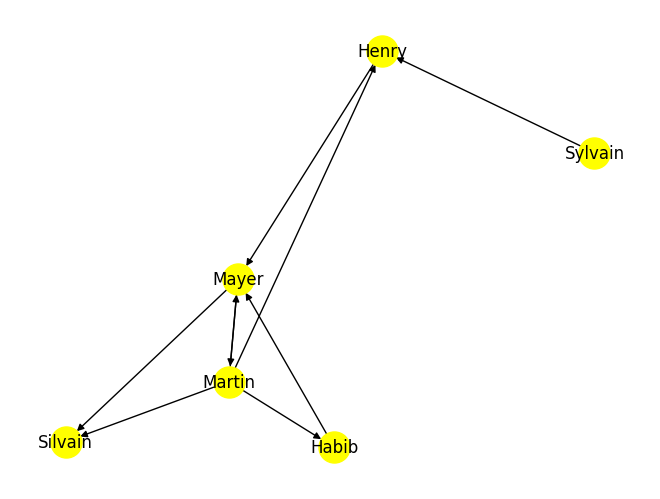

In [ ]:
#Membuat graf berbentuk directed graph
nx.draw(G, with_labels = True, node_size = 500, node_color = 'yellow')
plt.show()

In [ ]:
ec = nx.eigenvector_centrality(G, weight = weight, max_iter=1000)

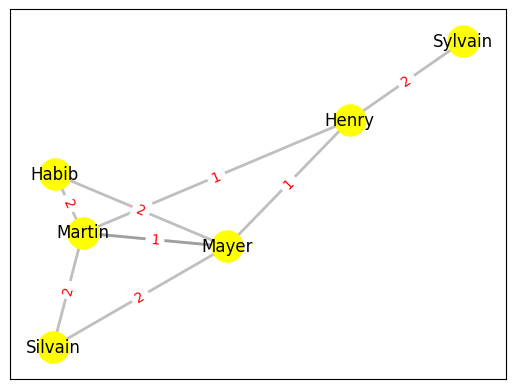

In [ ]:
node_size = [ec[n]*1000 for n in G.nodes()]
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='yellow')
nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos, width=2, edge_color= 'gray', alpha = 0.5, arrows=False)
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_size=10, font_color='red')
plt.axis('on')
plt.show()

In [ ]:
#Menghitung degree in dan degree out setiap node
degree_in = dict(G.in_degree())
degree_out = dict(G.out_degree())

#Mencetak degree in, degree out, dan centrality setiap node
for node in G.nodes():
  print("Node:", node)
  print("Degree Out:", degree_in[node])
  print("Degree In:", degree_out[node])
  print("Centrality:", abs(ec[node]))
  print()

Node: Sylvain
Degree Out: 0
Degree In: 1
Centrality: 1.303671431075254e-07

Node: Henry
Degree Out: 2
Degree In: 1
Centrality: 0.24977262572114078

Node: Mayer
Degree Out: 3
Degree In: 2
Centrality: 0.5781202663031925

Node: Martin
Degree Out: 1
Degree In: 4
Centrality: 0.3799972775412497

Node: Habib
Degree Out: 1
Degree In: 1
Centrality: 0.24977053984685105

Node: Silvain
Degree Out: 2
Degree In: 0
Centrality: 0.6297676870209576



In [ ]:
# Membuat list kosong untuk menyimpan data
node_list = []
degree_in_list = []
degree_out_list = []
centrality_list = []

# Mengisi list dengan data dari perulangan
for node in G.nodes():
  node_list.append(node)
  degree_in_list.append(degree_in[node])
  degree_out_list.append(degree_out[node])
  centrality_list.append(abs(ec[node]))

# Membuat dataframe dari list
df = pd.DataFrame({
    'Node': node_list,
    'Degree In': degree_in_list,
    'Degree Out': degree_out_list,
    'Centrality': centrality_list
})

# Menyimpan dataframe ke dalam file Excel
df.to_excel('eigen.xlsx', index=False)


In [ ]:
#Mencetak aktor paling berpengaruh berdasarkan eigen centrality
most_influential_player = max(ec, key=ec.get)
print("Pemain paling berpengaruh berdasarkan pass complete dan goal_possesion dalah:", most_influential_player)

Pemain paling berpengaruh berdasarkan pass complete dan goal_possesion dalah: Silvain
